# Unlocking the Future: Predicting Real Estate Market Trends with Time Series Analysis 

# INTRODUTION




## 1.1 Business Understanding

This project serves as a consulting opportunity for a fictional real estate investment firm, emphasizing the application of time series analysis. Their core objective is to leverage Zillow Research data for predicting property price trends in diverse zip codes. By harnessing the power of data-driven insights, the firm seeks to enhance investment decision-making, reduce risks, and gain a competitive advantage in the real estate sector. Time series modeling will be instrumental in guiding them toward profitable, compliant, and strategic investments aligned with their long-term goals.

## 1.2 Problem Statement

## 1.3 Objectives









### 1.3.1 Main Objective

The primary aim of this project to leverage time series modeling to provide the real-estate investment firm with actionable insights and forecasts pertaining to real estate price dynamics in various zip codes. These time-driven analyses will enable the firm to make informed investment decisions, uncover potential opportunities, and proactively address risks within the ever-changing landscape of the real estate market.

### 1.3.2 Specific Objectives

- Choose and train appropriate time series forecasting models for real estate price data in 
  zip  codes.
- Evaluate the potential risks associated with investing in various zip codes based on forecasted real 
  estate price trends, and develop strategies to mitigate these risks.  
- Provide tailored investment recommendations for each zip code, including which areas present promising
  opportunities, which ones require caution, and strategies for optimizing the real estate investment portfolio.  

## 1.4 Data Understanding

In this project, we have utilized a dataset sourced from various states within the United States, capturing historical median house prices spanning a 22-year period, ranging from April 1996 to April 2018. This comprehensive dataset was acquired from the Zillow website.

The dataset comprises 14,723 rows and boasts a substantial 272 columns.

Within these 272 columns, four are of a categorical nature, while the remainder are numerical. Here's an overview of the key columns:

  - RegionID: This is a unique identifier for each region.
  - RegionName: Corresponds to the names of regions, typically representing zip codes.
  - City: Provides the city names associated with the respective regions.
  - State: Indicates the states in which these regions are located.
  - Metro: Identifies the metropolitan areas to which these regions belong.
  - County Name: Specifies the names of the counties where these regions are situated.
  - Size Rank: Represents the rank of zip codes based on their level of urbanization.
  - Date Columns (265 Columns): These encompass a vast array of columns that are likely to 
    contain    median house prices over the 22-year duration, providing a detailed historical perspective."

# 2. LOADING LIBRARIES

In [167]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

import warnings
warnings.filterwarnings('ignore')


## 3.DATA COLLECTION

In [168]:
#Loading the zillow dataset
df = pd.read_csv('zillow_data.csv')
df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


In [169]:
#Displaying the first 5 rows
df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


In [170]:
#Displaying the last 5 rows
df.tail()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
14718,58333,1338,Ashfield,MA,Greenfield Town,Franklin,14719,94600.0,94300.0,94000.0,...,216800,217700,218600,218500,218100,216400,213100,209800,209200,209300
14719,59107,3293,Woodstock,NH,Claremont,Grafton,14720,92700.0,92500.0,92400.0,...,202100,208400,212200,215200,214300,213100,213700,218300,222700,225800
14720,75672,40404,Berea,KY,Richmond,Madison,14721,57100.0,57300.0,57500.0,...,121800,122800,124600,126700,128800,130600,131700,132500,133000,133400
14721,93733,81225,Mount Crested Butte,CO,NaN,Gunnison,14722,191100.0,192400.0,193700.0,...,662800,671200,682400,695600,695500,694700,706400,705300,681500,664400
14722,95851,89155,Mesquite,NV,Las Vegas,Clark,14723,176400.0,176300.0,176100.0,...,333800,336400,339700,343800,346800,348900,350400,353000,356000,357200


In [171]:
#Displaying the summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14723 entries, 0 to 14722
Columns: 272 entries, RegionID to 2018-04
dtypes: float64(219), int64(49), object(4)
memory usage: 30.6+ MB


In [172]:
#Displaying the numeric summary of the dataset
df.describe()

,RegionID,RegionName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
count,14723.000000,14723.000000,14723.000000,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,...,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04
mean,81075.010052,48222.348706,7362.000000,1.182991e+05,1.184190e+05,1.185374e+05,1.186531e+05,1.187803e+05,1.189275e+05,1.191205e+05,...,2.733354e+05,2.748658e+05,2.764646e+05,2.780332e+05,2.795209e+05,2.810953e+05,2.826571e+05,2.843687e+05,2.865114e+05,2.880399e+05
std,31934.118525,29359.325439,4250.308342,8.600251e+04,8.615567e+04,8.630923e+04,8.646795e+04,8.665094e+04,8.687208e+04,8.715185e+04,...,3.603984e+05,3.614678e+05,3.627563e+05,3.644610e+05,3.656003e+05,3.670454e+05,3.695727e+05,3.717739e+05,3.724612e+05,3.720544e+05
min,58196.000000,1001.000000,1.000000,1.130000e+04,1.150000e+04,1.160000e+04,1.180000e+04,1.180000e+04,1.200000e+04,1.210000e+04,...,1.440000e+04,1.450000e+04,1.470000e+04,1.480000e+04,1.450000e+04,1.430000e+04,1.410000e+04,1.390000e+04,1.380000e+04,1.380000e+04
25%,67174.500000,22101.500000,3681.500000,6.880000e+04,6.890000e+04,6.910000e+04,6.920000e+04,6.937500e+04,6.950000e+04,6.960000e+04,...,1.269000e+05,1.275000e+05,1.282000e+05,1.287000e+05,1.292500e+05,1.299000e+05,1.306000e+05,1.310500e+05,1.319500e+05,1.324000e+05
50%,78007.000000,46106.000000,7362.000000,9.950000e+04,9.950000e+04,9.970000e+04,9.970000e+04,9.980000e+04,9.990000e+04,9.995000e+04,...,1.884000e+05,1.896000e+05,1.905000e+05,1.914000e+05,1.925000e+05,1.934000e+05,1.941000e+05,1.950000e+05,1.967000e+05,1.981000e+05
75%,90920.500000,75205.500000,11042.500000,1.432000e+05,1.433000e+05,1.432250e+05,1.432250e+05,1.435000e+05,1.437000e+05,1.439000e+05,...,3.050000e+05,3.066500e+05,3.085000e+05,3.098000e+05,3.117000e+05,3.134000e+05,3.151000e+05,3.168500e+05,3.188500e+05,3.211000e+05
max,753844.000000,99901.000000,14723.000000,3.676700e+06,3.704200e+06,3.729600e+06,3.754600e+06,3.781800e+06,3.813500e+06,3.849600e+06,...,1.888990e+07,1.870350e+07,1.860530e+07,1.856940e+07,1.842880e+07,1.830710e+07,1.836590e+07,1.853040e+07,1.833770e+07,1.789490e+07


In [173]:
df.shape

(14723, 272)

The dataset above has both numerical and categorical variables. It has 14723 rows and 272 columns.

## 4. DATA PREPROCESSING

This process involves:
1. Renaming the RegionName column
2. Converting column names into datetime objects
3. Handling missing values
4. Checking for duplicates
5. data transformations

### 4.1 Renaming of the RegionName column

In [174]:
# Renaming the RegionName column to zipcode

df = df.rename(columns={'RegionName': 'Zipcode'})
df.head()

,RegionID,Zipcode,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


### 4.2 Converting column names into datetime objects

In [175]:
#Converting column names into datetime objects as datetime objects based on the 'YYYY-MM' format.
def get_datetimes(df):
    
    return pd.to_datetime(df.columns.values[1:], format='%Y-%m')

### 4.3 Detecting and handling missing values

In [176]:
#Checking for missing values in the dataset
df.isnull().sum().sum()

157934

The are 157934 missing data points.

In [177]:
def explore_missing_data(df):
    # Calculate the number of missing values for each column
    missing_data = df.isna().sum()
    
    # Filter columns with missing values
    missing_data = missing_data[missing_data > 0]
    
    # Convert the result to a DataFrame
    missing_data_df = missing_data.to_frame().T
    
    return missing_data_df

In [178]:
explore_missing_data(df)

,Metro,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,...,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06
0,1043,1039,1039,1039,1039,1039,1039,1039,1039,1039,...,109,109,109,109,56,56,56,56,56,56


This transposed DataFrame provides a concise horizontal view of the missing data, making it easier to inspect and analyze.
The Metro and Date columns contain missing values as seen above.

For the date columns, we will employ interpolation to fill in the missing values.
In the 'metro' column, any missing values will be substituted with the label 'missing'.

In [179]:
#Handing missing values in the Metro column
df['Metro'].fillna('missing', inplace=True)

In [180]:
df.isna().sum().sum()

156891

In [181]:
#Filling missing values using linear interpolation
df.interpolate(inplace=True)

In [182]:
df.isna().sum().sum()

0

In [183]:
df.head()

,RegionID,Zipcode,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


The dataset has no missing values.

### 4.4 Checking for duplicates

In [184]:
#Checking for duplicates in the dataset
df.duplicated().sum()

0

There are no duplicates in the dataset.

In [185]:
# exploring the datatype of zipcode column

df.dtypes['Zipcode']

dtype('int64')

Zipcodes correspond to specific geographical locations, making them better suited for categorical data types. Therefore, we will convert the Zipcode column from an integer type to a string type.

In [186]:
#Converting zipcodes to string datatype
df.Zipcode = df.Zipcode.astype('string')
df.dtypes['Zipcode']

string[python]

In [187]:
# exploring the format of the zip codes

print(df.Zipcode.min())
print(df.Zipcode.max())

1001
99901


There is a variation in the length of zipcodes within the dataset, with some having four digits and others having five. To standardize the format and ensure consistency, we need to restructure the Zipcode column so that all zipcodes consist of five digits. It appears that the zipcodes with four digits are missing a leading zero, which should be added to achieve the desired five-digit format. This adjustment will help maintain uniformity in the data and facilitate accurate analysis.

In [188]:
#The zipcodes need to be 5 digits long, so a zero will be added to the ones that have four digits 
df['Zipcode'] = df['Zipcode'].str.zfill(5)

In [189]:
print(df.Zipcode.min())

01001


In [190]:
df.head()

,RegionID,Zipcode,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


 ## 5. EXPLORATION DATA ANLYSIS

In [191]:
font = {'family': 'normal',
        'weight': 'bold',
        'size': 22}

plt.rc('font', **font)

# NOTE: if you visualizations are too cluttered to read, try calling 'plt.gcf().autofmt_xdate()'!

In [192]:
# setting a style for plots
sns.set_palette("Spectral")
sns.set_style("darkgrid")

# defining a function to plot time series
def plot_time_series(df,col):
    
    # defining figsize
    plt.figure(figsize=(10,6), tight_layout=True)
    plt.plot(df[col], linewidth=2,label=f"{col}")
    plt.xlabel('Year')
    plt.ylabel(f'{col}')
    plt.title(f'{col} through the years')
    plt.legend()
    plt.show()

In [193]:
def plot_time_series(df, col):
    # defining figsize
    plt.figure(figsize=(10, 6), tight_layout=True)
    plt.plot(df.index, df[col], linewidth=2, label=f"{col}")
    plt.xlabel('Prices')
    plt.ylabel(f'{col}')
    plt.legend()
    plt.title(f'Time Series Plot of {col}')
    plt.grid(True)

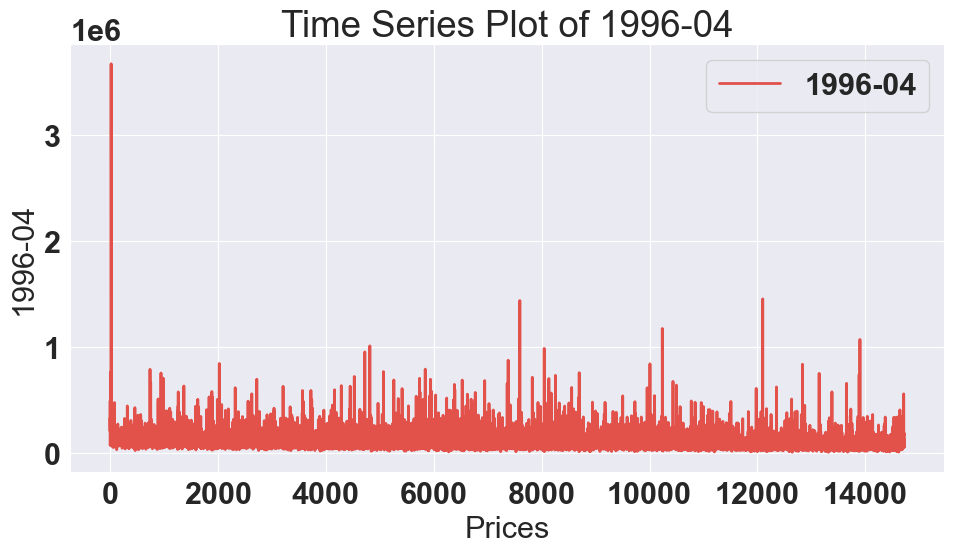

In [194]:
plot_time_series(df,"1996-04")

In [195]:
df

,RegionID,Zipcode,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14718,58333,01338,Ashfield,MA,Greenfield Town,Franklin,14719,94600.0,94300.0,94000.0,...,216800,217700,218600,218500,218100,216400,213100,209800,209200,209300
14719,59107,03293,Woodstock,NH,Claremont,Grafton,14720,92700.0,92500.0,92400.0,...,202100,208400,212200,215200,214300,213100,213700,218300,222700,225800
14720,75672,40404,Berea,KY,Richmond,Madison,14721,57100.0,57300.0,57500.0,...,121800,122800,124600,126700,128800,130600,131700,132500,133000,133400
14721,93733,81225,Mount Crested Butte,CO,missing,Gunnison,14722,191100.0,192400.0,193700.0,...,662800,671200,682400,695600,695500,694700,706400,705300,681500,664400


## 6. Reshape from Wide to Long Format

In [196]:
new_df = pd.melt(df.copy(), id_vars = ['RegionID', 'Zipcode', 'City', 'State', 'Metro', 'CountyName', 'SizeRank'], var_name = 'Time', value_name= 'Value')
new_df

,RegionID,Zipcode,City,State,Metro,CountyName,SizeRank,Time,Value
0,84654,60657,Chicago,IL,Chicago,Cook,1,1996-04,334200.0
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,1996-04,235700.0
2,91982,77494,Katy,TX,Houston,Harris,3,1996-04,210400.0
3,84616,60614,Chicago,IL,Chicago,Cook,4,1996-04,498100.0
4,93144,79936,El Paso,TX,El Paso,El Paso,5,1996-04,77300.0
...,...,...,...,...,...,...,...,...,...
3901590,58333,01338,Ashfield,MA,Greenfield Town,Franklin,14719,2018-04,209300.0
3901591,59107,03293,Woodstock,NH,Claremont,Grafton,14720,2018-04,225800.0
3901592,75672,40404,Berea,KY,Richmond,Madison,14721,2018-04,133400.0
3901593,93733,81225,Mount Crested Butte,CO,missing,Gunnison,14722,2018-04,664400.0


In [197]:
 new_df['time'] = pd.to_datetime(new_df['Time'], infer_datetime_format=True)

In [198]:
new_df = new_df.dropna(subset=['Value'])

In [199]:
new_df

,RegionID,Zipcode,City,State,Metro,CountyName,SizeRank,Time,Value,time
0,84654,60657,Chicago,IL,Chicago,Cook,1,1996-04,334200.0,1996-04-01
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,1996-04,235700.0,1996-04-01
2,91982,77494,Katy,TX,Houston,Harris,3,1996-04,210400.0,1996-04-01
3,84616,60614,Chicago,IL,Chicago,Cook,4,1996-04,498100.0,1996-04-01
4,93144,79936,El Paso,TX,El Paso,El Paso,5,1996-04,77300.0,1996-04-01
...,...,...,...,...,...,...,...,...,...,...
3901590,58333,01338,Ashfield,MA,Greenfield Town,Franklin,14719,2018-04,209300.0,2018-04-01
3901591,59107,03293,Woodstock,NH,Claremont,Grafton,14720,2018-04,225800.0,2018-04-01
3901592,75672,40404,Berea,KY,Richmond,Madison,14721,2018-04,133400.0,2018-04-01
3901593,93733,81225,Mount Crested Butte,CO,missing,Gunnison,14722,2018-04,664400.0,2018-04-01


In [200]:
new_df.groupby('time').aggregate({'Value':'mean'})

,Value
time,
1996-04-01,117695.279495
1996-05-01,117817.167018
1996-06-01,117937.101813
1996-07-01,118053.847721
1996-08-01,118181.457583
...,...
2017-12-01,281095.320247
2018-01-01,282657.060382
2018-02-01,284368.688447


In [201]:
new_df.describe()

,RegionID,SizeRank,Value,time
count,3.901595e+06,3.901595e+06,3.901595e+06,3901595
mean,8.107501e+04,7.362000e+03,2.060636e+05,2007-04-01 18:12:13.584906496
min,5.819600e+04,1.000000e+00,1.130000e+04,1996-04-01 00:00:00
25%,6.717400e+04,3.681000e+03,9.770000e+04,2001-10-01 00:00:00
50%,7.800700e+04,7.362000e+03,1.469000e+05,2007-04-01 00:00:00
75%,9.092100e+04,1.104300e+04,2.354000e+05,2012-10-01 00:00:00
max,7.538440e+05,1.472300e+04,1.931490e+07,2018-04-01 00:00:00
std,3.193304e+04,4.250165e+03,2.368017e+05,NaN


In [223]:
#Displaying the top 5 cities with highest house prices

houseprice_topcities = pd.DataFrame(new_df.groupby("City")["Value"].mean()
                                    .sort_values(ascending=False).head(10))

In [203]:
houseprice_topcities

,Value
City,
Atherton,3.487129e+06
Palm Beach,2.634498e+06
Snowmass Village,2.300179e+06
Portola Valley,2.131495e+06
Newport Coast,2.070006e+06
Montecito,1.991682e+06
Aspen,1.988169e+06
Rancho Santa Fe,1.959659e+06
Malibu,1.876195e+06


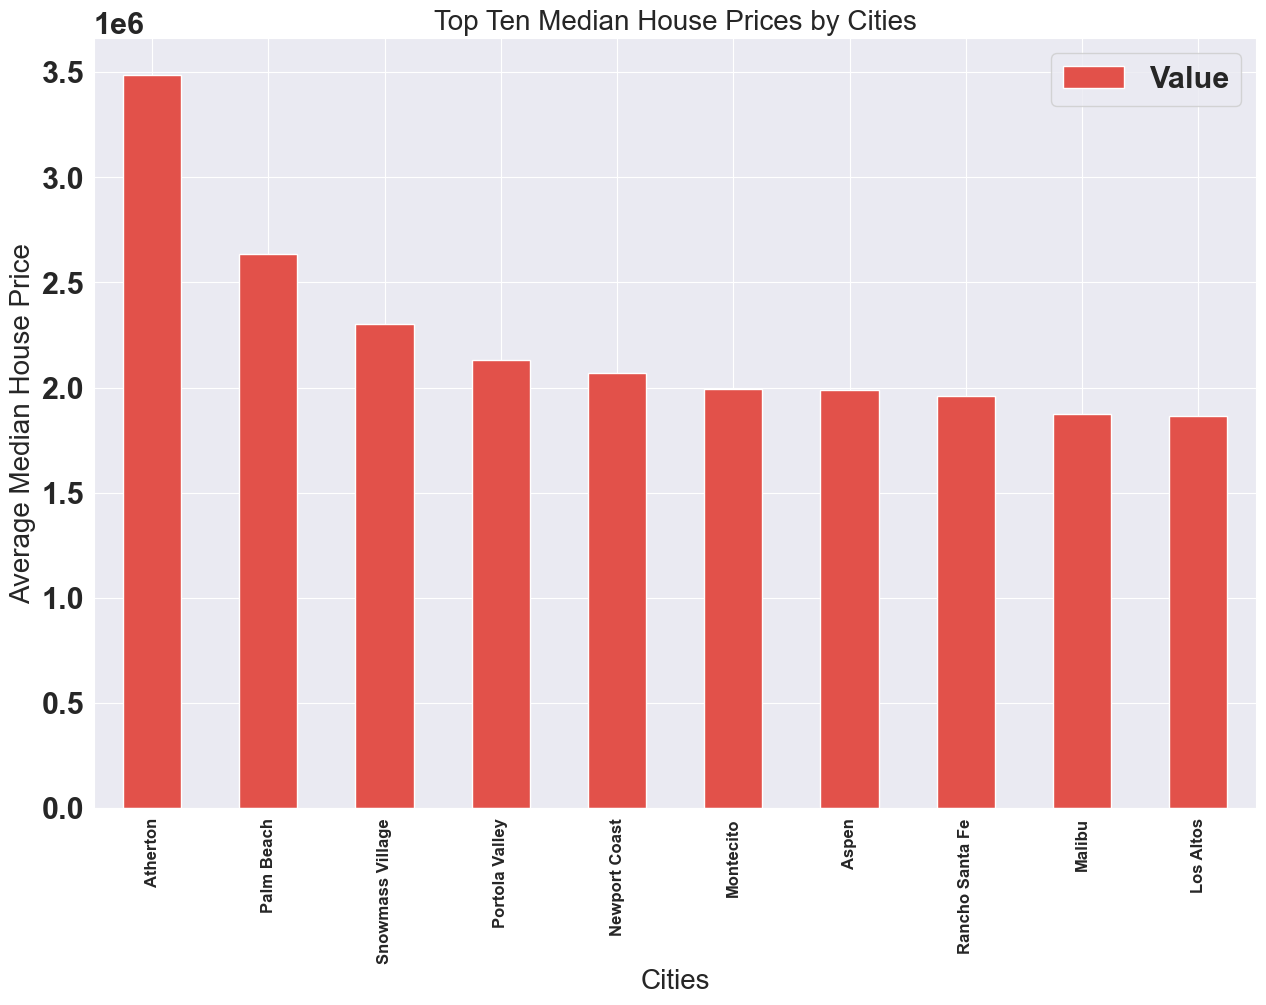

In [224]:
ax2 = houseprice_topcities.plot(kind='bar', figsize=(15,10));
ax2.set_alpha(0.8)
ax2.set_title("Top Ten Median House Prices by Cities", fontsize=20)
ax2.set_ylabel("Average Median House Price", fontsize=20);
ax2.set_xlabel("Cities", fontsize=20)
plt.xticks(fontsize= 12)
plt.savefig("output.jpg")
plt.show()